<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/main/Multiple_Linear_Regression_with_Kaggle_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [3]:
df = pd.read_csv('/content/Ecommerce Customers_Kaggle.csv')

In [18]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [8]:
X = df.iloc[:,3:7]

In [9]:
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [11]:
X = X.values

In [12]:
y = df.iloc[:,-1].values

## Visualize the data

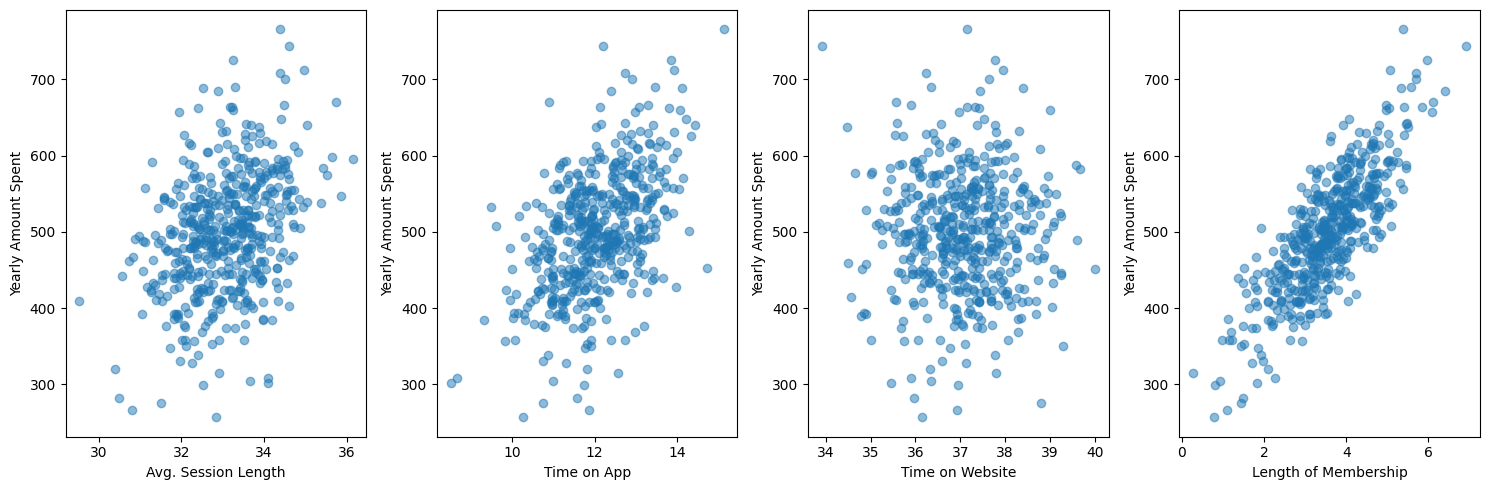

In [15]:
# prompt: Visualize the dataset in X and y with scatter plots in each subplot

plt.figure(figsize=(15, 5))
for i in range(X.shape[1]):
  plt.subplot(1, X.shape[1], i+1)
  plt.scatter(X[:, i], y, alpha=0.5)
  plt.xlabel(df.columns[i+3])
  plt.ylabel(df.columns[-1])
plt.tight_layout()
plt.show()

## Spliting Train-Test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_test.shape

(100, 4)

## Standardize the data

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Linear Regression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train, y_train)
print(f"The intercept is {lr.intercept_.round(2)}")
print(f"The coefficients are {lr.coef_.round(2)}")

The intercept is 501.99
The coefficients are [25.25 38.7   0.32 63.54]


In [26]:
y_pred = lr.predict(X_test)

In [29]:
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"R2: {metrics.r2_score(y_test, y_pred)}")

RMSE: 10.481590584636482
MAE: 8.558441885315242
R2: 0.9778130629184126


- Conclusion: Need to work on websites because it has the lowest coefficient value